In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [ ]:
data = pd.read_csv('/content/Heart Attack.csv')

In [ ]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
data.isnull().sum()

,0
age,0
gender,0
impluse,0
pressurehight,0
pressurelow,0
glucose,0
kcm,0
troponin,0
class,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

In [ ]:
x = data.drop('class', axis=1)
y = data['class']

In [ ]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
klasifikasi= DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)
klasifikasi.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)

In [ ]:
y_prediksi = klasifikasi.predict(x_test)
y_train_prediksi = klasifikasi.predict(x_train)

In [ ]:
print("Akurasi Training: ", accuracy_score(y_train, y_train_prediksi))
print("Akurasi Testing: ", accuracy_score(y_test, y_prediksi))
print("\nLaporan Klasifikasi:\n ", classification_report(y_test, y_prediksi))

Akurasi Training:  0.9971563981042654
Akurasi Testing:  0.9772727272727273

Laporan Klasifikasi:
                precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



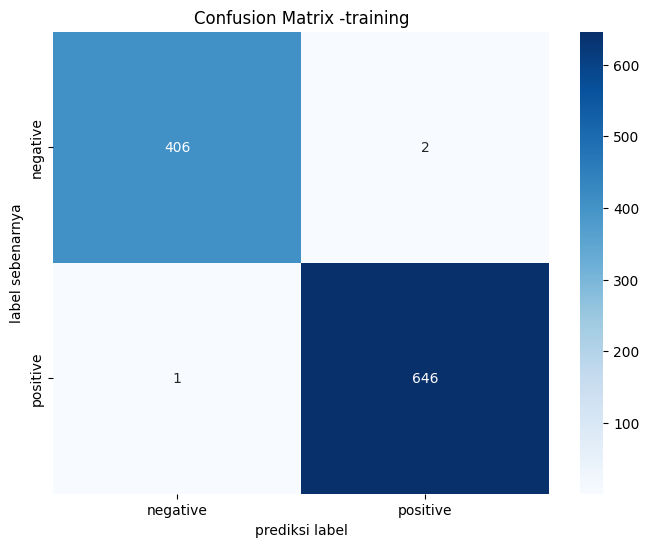

In [ ]:
matrix_training= confusion_matrix(y_train, y_train_prediksi)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_training, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('prediksi label')
plt.ylabel('label sebenarnya')
plt.title('Confusion Matrix -training')
plt.show()

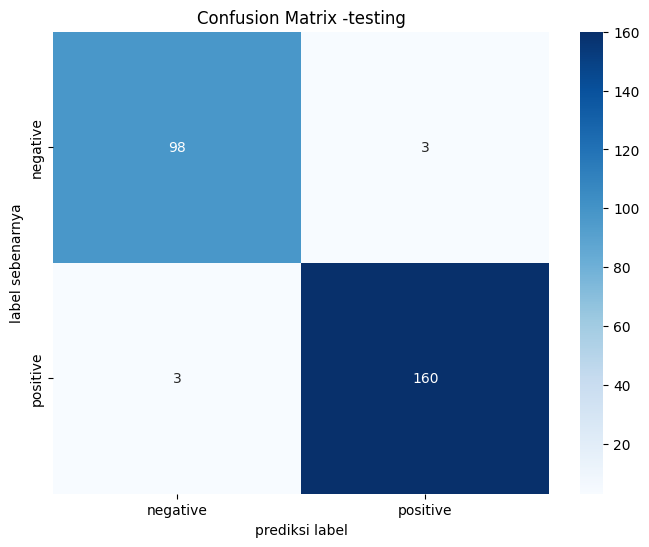

In [ ]:
matrix_testing= confusion_matrix(y_test, y_prediksi)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_testing, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('prediksi label')
plt.ylabel('label sebenarnya')
plt.title('Confusion Matrix -testing')
plt.show()